In [1]:
import requests
import pandas as pd


In [2]:
url="https://api.coingecko.com/api/v3/coins/markets"
params={
    'vs_currency':'inr',
    'order':'market_cap_desc',
    'per_page':10,
    'page':1,
    'sparkline':'false'
}

response=requests.get(url,params=params)

Parse JSON into dataframe

In [3]:
data=response.json()
df=pd.json_normalize(data)

In [4]:
df.head(3)

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated,roi.times,roi.currency,roi.percentage
0,bitcoin,btc,Bitcoin,https://coin-images.coingecko.com/coins/images...,9185436.00,182641151330712,1,182641325845921,1001713347890,9193315.00,...,-4.48426,2025-05-22T18:41:28.492Z,3993.42,229845.44136,2013-07-05T00:00:00.000Z,NaN,2025-06-28T17:48:59.167Z,NaN,NaN,NaN
1,ethereum,eth,Ethereum,https://coin-images.coingecko.com/coins/images...,208600.00,25179496158020,2,25179496158020,630096264384,208647.00,...,-42.46937,2021-11-10T14:24:19.604Z,28.13,740911.00117,2015-10-20T00:00:00.000Z,NaN,2025-06-28T17:49:01.385Z,29.358786,btc,2935.878636
2,tether,usdt,Tether,https://coin-images.coingecko.com/coins/images...,85.53,13469737669815,3,13469737669815,1198270880418,85.55,...,-18.94395,2025-01-25T16:51:57.989Z,36.86,132.04088,2015-03-02T00:00:00.000Z,NaN,2025-06-28T17:48:56.994Z,NaN,NaN,NaN


In [5]:
df_clean= df[['id',
              'symbol',
              'name',
              'current_price',
              'market_cap',
              'price_change_percentage_24h',
              'last_updated'
              ]]

In [6]:
df_clean.head(3)

,id,symbol,name,current_price,market_cap,price_change_percentage_24h,last_updated
0,bitcoin,btc,Bitcoin,9185436.00,182641151330712,0.72980,2025-06-28T17:48:59.167Z
1,ethereum,eth,Ethereum,208600.00,25179496158020,1.47199,2025-06-28T17:49:01.385Z
2,tether,usdt,Tether,85.53,13469737669815,0.01905,2025-06-28T17:48:56.994Z


In [7]:
df_clean.to_csv('crypto_prices_inr.csv', index=False)
print("✅ CSV saved successfully!")

✅ CSV saved successfully!


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

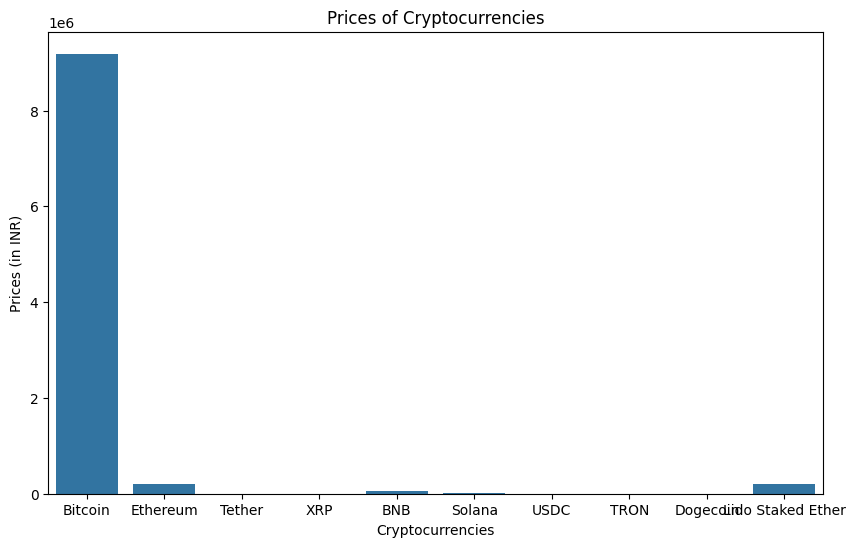

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_clean, x='name', y='current_price')
plt.title('Prices of Cryptocurrencies')
plt.xlabel('Cryptocurrencies')
plt.ylabel('Prices (in INR)')
plt.show()

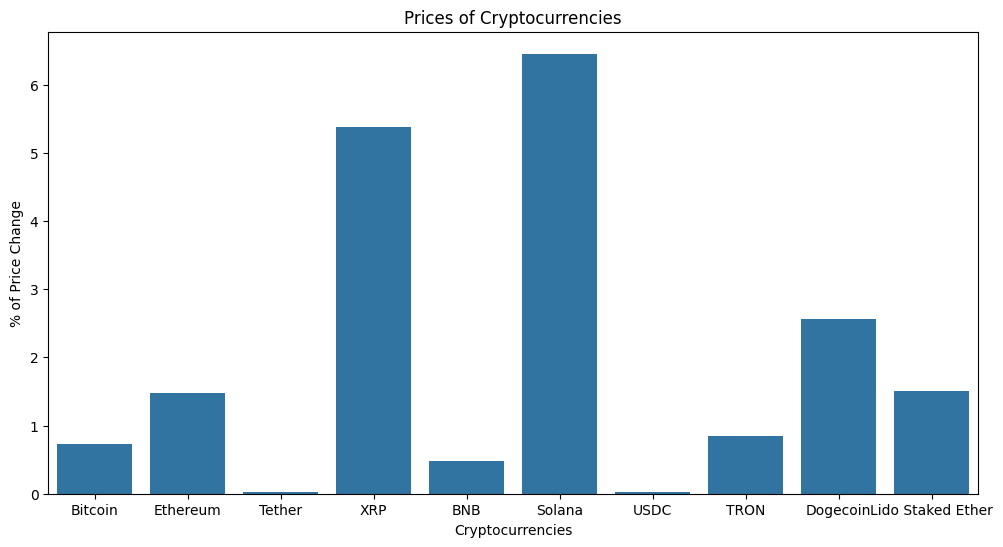

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_clean, x='name', y='price_change_percentage_24h')
plt.title('Prices of Cryptocurrencies')
plt.xlabel('Cryptocurrencies')
plt.ylabel('% of Price Change')
plt.show()